# Problem 2 - Precision, Recall, ROC

## 2.1

**Answer:**

True negative does not directly affect either the ROC or PR curve. The ROC curve plots the relationship between sensitivity(true positives) and specificity (false positives). True negatives are not explicitly involved when making the ROC curve but do they affect the class distribution so they can have significant impact on the interpretation of the ROC curve. PR curve - or Precision-Recall Curve evaluates the relationship/tradeoff between precision and recall which are both defined in terms of true positives and false positives just like ROC curve. PR curve is mostly focused on the performance on the positive samples so true nefatives are not directly part of their equation but they are again important in the interpretation of the PR curve.

As previously mentioned both ROC and PR curve only depend on true and false positive values. They are even futher related methematically as the PR curve can be obtained from the ROC curve using the positivee rate threshold tranformation. This transformation is defined as the fraction of positive cases that are predicted to be positive. By varying the positive rate threshold, we can generate different points on the ROC curve. For each point on the ROC curve, we can calculate the corresponding precision and recall values. This gives us a single point on the PR curve. Thus, since they can be mathematically obtained one from the other, any point on ROC must correspond to a unique point on th PR curve.


## 2.2

**Link to dataset:** https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=44

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from scipy.io import arff

data = arff.loadarff('dataset_44_spambase.arff')
df = pd.DataFrame(data[0])

# Convert byte values to strings
df['class'] = df['class'].str.decode('utf-8')

df['class'] = df['class'].astype(int)

df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


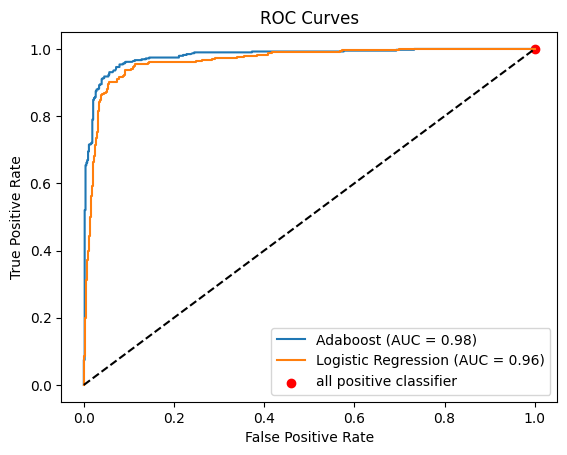

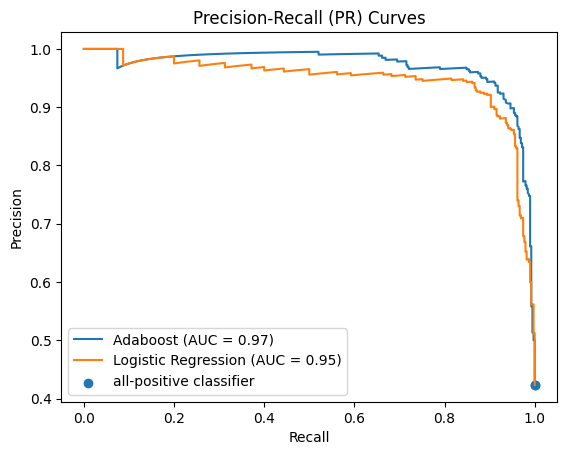

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Adaboost classifier
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Create and fit the Logistic Regression classifier
logistic_reg_clf = LogisticRegression(random_state=42)
logistic_reg_clf.fit(X_train, y_train)

# Predict probabilities for each classifier on the test data
y_prob_adaboost = adaboost_clf.predict_proba(X_test)[:, 1] #Adaboost
y_prob_logistic = logistic_reg_clf.predict_proba(X_test)[:, 1] #Logistic Regression

# Calculate ROC curve and AUC for Adaboost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Calculate precision-recall curve and AUC for Adaboost
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_prob_adaboost)
pr_auc_adaboost = average_precision_score(y_test, y_prob_adaboost)


# Calculate ROC curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

# Calculate precision-recall curve and AUC for Logistic Regression
precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_prob_logistic)
pr_auc_logistic = average_precision_score(y_test, y_prob_logistic)

# Plot ROC curves
plt.plot(fpr_adaboost, tpr_adaboost, label='Adaboost (AUC = {:.2f})'.format(roc_auc_adaboost))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_logistic))
plt.scatter([1], [1], label='all positive classifier', color='red')
plt.plot([0, 1], [0, 1], 'k--') #random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Plot PR curves
plt.plot(recall_adaboost, precision_adaboost, label='Adaboost (AUC = {:.2f})'.format(pr_auc_adaboost))
plt.plot(recall_logistic, precision_logistic, label='Logistic Regression (AUC = {:.2f})'.format(pr_auc_logistic))
plt.scatter([1., 1.], [precision_logistic[0], precision_adaboost[0]], label='all-positive classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curves')
plt.legend()
plt.show()

**Answer:**

We can see that both our ROC and PR curves have very high AUC for both algorithms which would idicate they are both preforming very well. Further, we can notice that the AUC for the Adaboost is a bit higher so we would probably chooe that algorithm if there are no other considerations we need to keep in mind.

On the ROC curve, our all-positive classifier is in the upper right corner since that is where both false positive and true positive rate are equal to 1 - thus an "all-positive classifier". On the PR curve, our all-positive classifier is in the lower right corner since that is where recall is equal to 1 which is when our true positive rate is equal to 1 since recal is a ratio between the true positives and sum of true positives and false negatives and thus when it is equal to 1 there are no false negatives, thus an "all-positive classifier".